# Utilisation des données de FilmTV.IT pour prédire les évaluations des films

## Résumé exécutif

Le but de ce projet est de prédire les votes des critiques pour les films en utilisant la régression linéaire multiple, dans le but d'identifier les principales caractéristiques influençant la popularité d'un film.

Le jeu de données provient de FilmTV et fournit une large gamme de sorties cinématographiques allant de 1897 à 2023, évitant ainsi un biais en faveur des films plus récents ou mieux notés. Les données ont été nettoyées en supprimant les informations non pertinentes, en examinant les doublons, en corrigeant les erreurs, en analysant les données manquantes et en écartant les valeurs aberrantes.

Des insights ont été obtenus grâce à des visualisations, y compris des histogrammes, des diagrammes circulaires, des diagrammes en barres et des boîtes à moustaches. L'analyse des 200 meilleurs et 200 moins bons films a montré une corrélation positive entre la durée, l'humour, le rythme, l'effort, la tension, l'érotisme et les notes des critiques. Cela a conduit à l'hypothèse nulle selon laquelle il n'existe aucune relation entre la durée, l'humour, l'effort, la tension et l'érotisme (variables prédictives) et la note des critiques (variable cible). L'hypothèse alternative est que les variables prédictives ont un effet positif sur la variable cible.

Pour construire le modèle, des corrélations ont été calculées entre les variables sélectionnées et le vote des critiques. Pour améliorer la précision, seules les variables les plus fortement corrélées ont été choisies. Le modèle de régression linéaire a été construit en utilisant l'effort et la tension, car ce sont les seules variables présentant des corrélations notables. Le R-carré ajusté de 0,274 indique qu'une faible partie de la variation de la variable cible est expliquée par la variation des variables explicatives, et le modèle est incapable de faire des prédictions précises. Bien que l'effort et la tension influencent positivement le vote des critiques, soutenant l'hypothèse alternative, le modèle ne devrait pas être utilisé pour guider les actions.

Le modèle est incapable de résoudre le problème commercial en raison de la faible valeur du R-carré ajusté. Malgré cela, le code peut être adapté pour différentes découpes des données, comme se concentrer sur les films modernes ou des genres spécifiques.

### Introduction

Ce projet vise à prédire le vote des critiques pour les films en utilisant la régression linéaire, en suivant les sept étapes d'Alivia Smith pour mener à bien un projet de science des données (Smith, 2023).

![image.png](attachment:14378667-4657-4441-873b-7c60d6940d72.png)

### 2. Obtenir les données

J'ai un vif intérêt pour le cinéma et je cherche à développer mes compétences en modélisation de données, donc un ensemble de données de films nécessitant peu de nettoyage est préférable. L'ensemble de données est propre et structuré, avec un score d'utilisabilité Kaggle de 10,00. Des modèles de régression linéaire prédissant les notes des films ont déjà été construits en utilisant des données d'IMDb, une base de données en ligne populaire pour les films et la télévision, par exemple les modèles de Lazovskiy (Lazovskiy, 2018) et de Bayat (Bayat, 2022), cependant cela ne semble pas avoir été fait avec les données FilmTV. Ces données ont été analysées par d'autres utilisateurs de Kaggle, en se concentrant sur les tendances de variables telles que le genre, l'acteur et l'année de sortie. J'ai choisi les données FilmTV car bien qu'elles ne soient pas aussi populaires qu'IMDb, il y a une plus grande sélection de colonnes numériques à analyser, les films étant évalués sur des aspects tels que l'humour et la tension. 

Les données ont été extraites le 21 octobre 2023, elles sont donc très récentes, et incluent des sorties allant de 1897 à 2023. Une grande variété de films est incluse et les données ne sont pas biaisées en faveur des films modernes ou des films très bien notés, ce qui aurait pu fausser les résultats.

### 1. Definition des objectifs

Le modèle de données devrait montrer quelles caractéristiques rendent un film populaire auprès des critiques, ce qui pourrait être utile à tout cinéaste en herbe ! Une régression linéaire multiple devrait me permettre de comprendre la relation entre les variables choisies et le vote des critiques, et de faire des prédictions (Indeed Editorial Team, 2023).

La régression linéaire suppose qu'il existe une relation linéaire entre les variables. Le modèle mesure également la relation entre la moyenne des variables, donc il ne décrit pas entièrement l'ensemble des données (Rout, 2020). Pour remédier à cela, seules les variables ayant les corrélations les plus fortes avec le score des critiques seront sélectionnées, et la précision sera évaluée pour comprendre dans quelle mesure il peut prédire les scores.

![image.png](attachment:5061028b-412e-421e-888a-826e0f22307f.png)

In [1]:
# importation du package
import pandas as pd

In [45]:
# chargement du jeu de données et nommage du DataFrame
df_filmtv= pd.read_csv("D:/PROJETS_Perso/FILM RECOMMANDATION/filmtv_movies.csv")

# impression des 10 premières lignes pour vérifier le contenu
print(df_filmtv.head(10))

   filmtv_id                                        title  year      genre  \
0          2  Bugs Bunny's Third Movie: 1001 Rabbit Tales  1982  Animation   
1          3                    18 anni tra una settimana  1991      Drama   
2         17                             Ride a Wild Pony  1976   Romantic   
3         18                                        Diner  1982     Comedy   
4         20              A che servono questi quattrini?  1942     Comedy   
5         21                       The Uranian Conspiracy  1978        Spy   
6         22                            A ciascuno il suo  1967      Drama   
7         23                                    Dead-Bang  1989      Crime   
8         24                          A... come assassino  1966   Thriller   
9         26                               At Close Range  1986      Drama   

   duration                 country                             directors  \
0        76           United States  David Detiege, Art Davis, B

In [46]:
# compter le nombre d'enregistrements dans le DataFrame
len(df_filmtv)

41399

In [47]:
# révision des en-têtes de colonnes
df_filmtv.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'erotism'],
      dtype='object')

### 3. Nettoyage des données

Cette étape suivra la structure de nettoyage des données de Mesevage (Mesevage, 2021).

#### 3.1 Supprimer les données non pertinentes

In [48]:
# suppression des colonnes non nécessaires à l'analyse
df_filmtv = df_filmtv.drop(['country', 'directors', 'actors', 'avg_vote', 'public_vote', 'total_votes', 'description', 'notes'], axis=1)

# révision des intitulés de colonnes restants
df_filmtv.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'critics_vote',
       'humor', 'rhythm', 'effort', 'tension', 'erotism'],
      dtype='object')

#### 3.2 Supprimer les doublons des données

In [49]:
# comptage du nombre de lignes en double
len(df_filmtv)-len(df_filmtv.drop_duplicates())

0

Le code compare la longueur du dataframe original avec celle du dataframe dont les doublons ont été supprimés. Le résultat est zéro, donc il n'y a pas de doublons dans le dataframe original.

#### 3.3 Corriger les erreurs structurelles

Deux fautes d'orthographe ont été trouvées dans la colonne des genres et ont été corrigées :

In [50]:
#remplacer 'Mélo' par 'Melodrama' dans la colonne des genres
df_filmtv['genre'] = df_filmtv['genre'].replace({
    'Mélo': 'Melodrama',
    'Sperimental': 'Experimental'
})

In [51]:
# examiner les valeurs uniques dans la colonne genre pour valider les valeurs de remplacement
pd.concat([df_filmtv['genre']]).unique()

array(['Animation', 'Drama', 'Romantic', 'Comedy', 'Spy', 'Crime',
       'Thriller', 'Adventure', 'Documentary', 'Horror', 'Action',
       'Western', 'Biography', 'Musical', 'Sci-Fi', 'War', 'Grotesque',
       'Gangster', 'Fantasy', 'Melodrama', 'Mythology', 'History',
       'Erotico', 'Noir', 'Super-hero', 'Biblical', 'Sport',
       'Experimental', nan, 'Short Movie', 'Stand-up Comedy'],
      dtype=object)

#### 3.4 Gérer les données manquantes

In [52]:
# vérification des valeurs nulles
df_filmtv.isnull().sum(axis = 0)

filmtv_id          0
title              0
year               0
genre             95
duration           0
critics_vote    4696
humor              0
rhythm             0
effort             0
tension            0
erotism            0
dtype: int64

In [53]:
# suppression des lignes nulles
df_filmtv = df_filmtv.dropna()

In [54]:
# re-vérification des valeurs nulles
df_filmtv.isnull().sum(axis = 0)

filmtv_id       0
title           0
year            0
genre           0
duration        0
critics_vote    0
humor           0
rhythm          0
effort          0
tension         0
erotism         0
dtype: int64

#### 3.5 Supprimer les valeurs aberrantes

Il y a certains films qui obtiennent zéro pour l'humour, le rythme, l'effort, la tension et l'érotisme. Ceux-ci seront retirés du jeu de données car il n'est pas clair si la note est manquante ou si le film ne présente pas ces attributs. Ces lignes seront supprimées car elles pourraient fausser les données.

In [55]:
# somme des colonnes humour - érotisme
df_filmtv['sum_attributes']= df_filmtv.iloc[:,-5:].sum(axis=1)

# impression des 10 premières lignes pour vérifier la somme
print(df_filmtv.head(10))

   filmtv_id                                        title  year      genre  \
0          2  Bugs Bunny's Third Movie: 1001 Rabbit Tales  1982  Animation   
1          3                    18 anni tra una settimana  1991      Drama   
2         17                             Ride a Wild Pony  1976   Romantic   
3         18                                        Diner  1982     Comedy   
4         20              A che servono questi quattrini?  1942     Comedy   
5         21                       The Uranian Conspiracy  1978        Spy   
6         22                            A ciascuno il suo  1967      Drama   
7         23                                    Dead-Bang  1989      Crime   
8         24                          A... come assassino  1966   Thriller   
9         26                               At Close Range  1986      Drama   

   duration  critics_vote  humor  rhythm  effort  tension  erotism  \
0        76          8.00      3       3       0        0        0   
1

In [56]:
# supprimer toutes les lignes dont la valeur de sum_attributes est zéro
df_filmtv = df_filmtv.drop(df_filmtv[df_filmtv['sum_attributes'] == 0].index)

In [57]:
# il y a aussi un film d'une durée de 1525 minutes. suppression de cet enregistrement car cela fausserait les résultats
df_filmtv = df_filmtv.drop(df_filmtv[df_filmtv['duration'] == 1525].index)

#### 3.6 Validation

In [58]:
# vérifier qu'il y a suffisamment de données pour créer le modèle de données
len(df_filmtv)

25955

Il y a 25 955 lignes dans le jeu de données final. J'ai utilisé la formule de Slovin pour vérifier que cela représente fidèlement les données originales. J'ai fixé le niveau de confiance à 95 %, car c'est l'un des niveaux les plus couramment utilisés par les analystes (Hayes, 2023). J'ai utilisé un calculateur en ligne pour déterminer le nombre de lignes de données nécessaires (Bobbitt, 2023). Il faudrait environ 396 lignes de données pour atteindre un niveau de confiance de 95 %, donc le jeu de données dépasse largement cette exigence.

In [59]:
# vérification des types de données
df_filmtv.dtypes

filmtv_id           int64
title              object
year                int64
genre              object
duration            int64
critics_vote      float64
humor               int64
rhythm              int64
effort              int64
tension             int64
erotism             int64
sum_attributes      int64
dtype: object

Les types de données sont conformes aux attentes, toutes les colonnes catégorielles étant des objets et toutes les colonnes numériques étant des entiers ou des nombres à virgule flottante

### 4. Enrichir les données

Il n'y a pas de données supplémentaires à joindre à l'ensemble de données pour ce projet.

### 5. Trouver des insights et visualiser

#### 5.1 Visualisation de l'ensemble du jeu de données

Le jeu de données va maintenant être analysé pour en tirer des insights.

In [60]:
# importing package
import matplotlib.pyplot as plt

# summary of the films data frame
print(df_filmtv.describe())

           filmtv_id          year      duration  critics_vote         humor  \
count   25955.000000  25955.000000  25955.000000  25955.000000  25955.000000   
mean    26604.164516   1986.888692    101.054248      5.833904      0.911270   
std     24441.851585     22.012991     22.750827      1.545180      0.987216   
min         2.000000   1911.000000     41.000000      1.000000      0.000000   
25%     10639.000000   1970.000000     90.000000      4.670000      0.000000   
50%     21359.000000   1993.000000     98.000000      6.000000      1.000000   
75%     38510.500000   2005.000000    108.000000      7.000000      2.000000   
max    232132.000000   2023.000000    924.000000     10.000000      5.000000   

             rhythm        effort       tension       erotism  sum_attributes  
count  25955.000000  25955.000000  25955.000000  25955.000000    25955.000000  
mean       2.124254      1.078482      1.452899      0.488769        6.055673  
std        0.676966      1.236519      

Cela montre que la durée moyenne des films était d'environ 101 minutes. La note moyenne des critiques était d'environ 5,8. Parmi les attributs du film, le rythme a la moyenne la plus élevée, et l'érotisme la plus basse.

Création d'un histogramme pour montrer la répartition des scores des critiques. Les histogrammes permettent de mieux visualiser les motifs dans les données continues, dans ce cas précis, quels scores des critiques apparaissent le plus fréquemment dans l'ensemble de données (Valcheva, 2017).

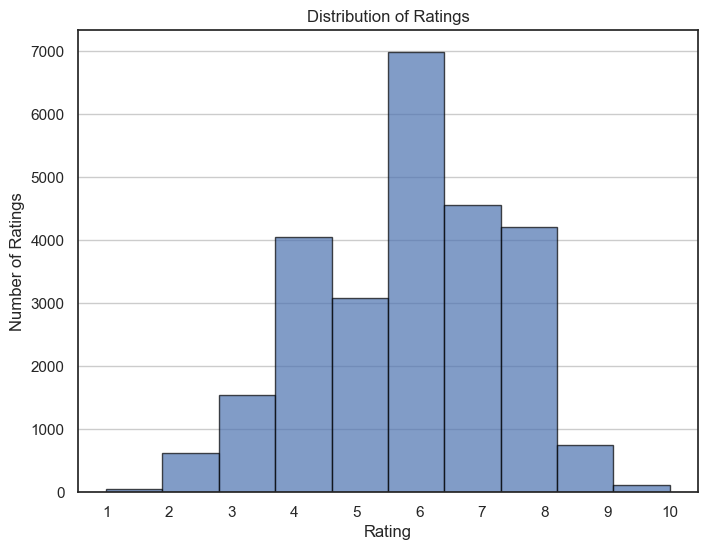

In [61]:
# importing package
import matplotlib.pyplot as plt

# creating histogram
plt.figure(figsize=(8,6))
plt.hist(df_filmtv['critics_vote'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

Cela montre que 5,5 à 6,5 est le score le plus fréquent. Il y a presque une distribution normale, puisqu'il y a une certaine symétrie de chaque côté de la valeur moyenne (McLeod, 2023).

Création de graphiques circulaires pour montrer la répartition de chaque attribut. Les graphiques circulaires montrent efficacement la répartition proportionnelle des données (Tomboc, 2021).

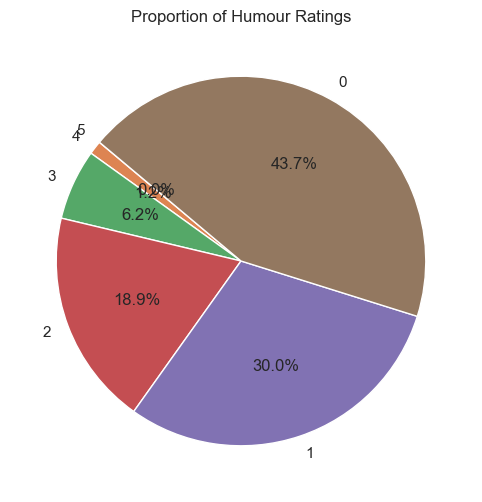

In [62]:
# créer un diagramme circulaire des évaluations d'humour et trier les évaluations par fréquence
ratings_count = df_filmtv['humor'].value_counts().sort_values()
plt.figure(figsize=(8,6))
plt.pie(ratings_count, labels=ratings_count.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Humour Ratings')
plt.show()

La majorité des films ont une note de 0 pour l'humour. Les proportions diminuent à mesure que les notes augmentent.

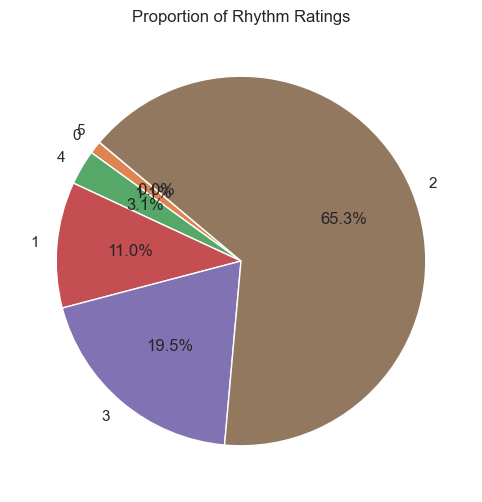

In [63]:
# creating rhythm ratings pie chart, and sorting ratings by frequency
ratings_count = df_filmtv['rhythm'].value_counts().sort_values()
plt.figure(figsize=(8,6))
plt.pie(ratings_count, labels=ratings_count.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Rhythm Ratings')
plt.show()

La majorité des films ont une note de 2 pour le rythme, suivie de 3.

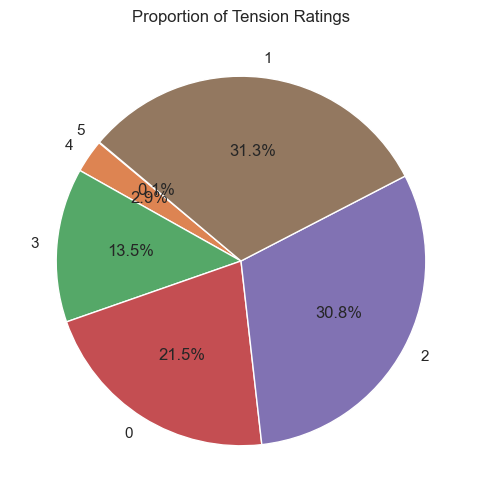

In [64]:
# creating tension ratings pie chart, and sorting ratings by frequency
ratings_count = df_filmtv['tension'].value_counts().sort_values()
plt.figure(figsize=(8,6))
plt.pie(ratings_count, labels=ratings_count.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Tension Ratings')
plt.show()

La majorité des films ont une note de 1 pour la tension, suivie de 2.

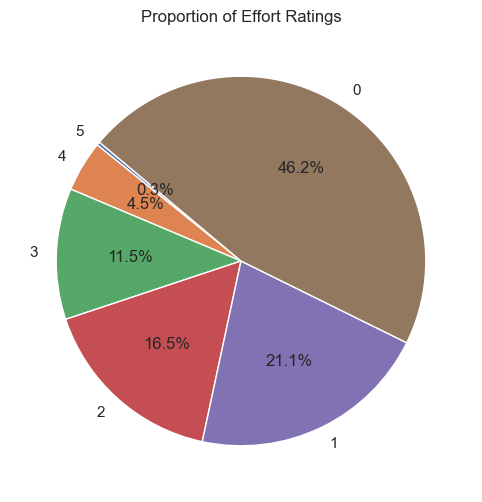

In [65]:
# creating effort ratings pie chart, and sorting ratings by frequency
ratings_count = df_filmtv['effort'].value_counts().sort_values()
plt.figure(figsize=(8,6))
plt.pie(ratings_count, labels=ratings_count.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Effort Ratings')
plt.show()

La majorité des films ont une note de 0 pour l'effort, et les proportions diminuent à mesure que les notes augmentent. Cela suit le même schéma que l'humour.

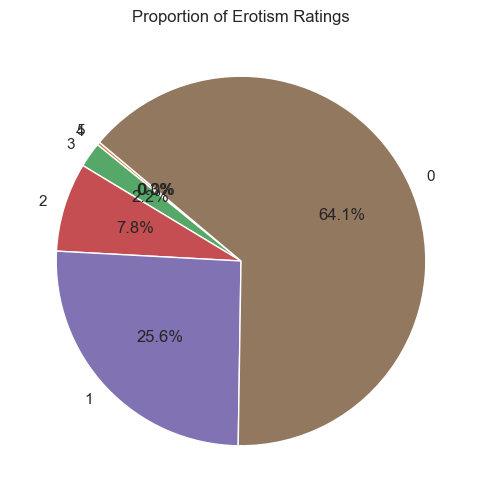

In [66]:
# creating erotism ratings pie chart, sorting ratings by frequency
ratings_count = df_filmtv['erotism'].value_counts().sort_values()
plt.figure(figsize=(8,6))
plt.pie(ratings_count, labels=ratings_count.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Erotism Ratings')
plt.show()

Encore une fois, la majorité des films ont une note de 0 pour l'effort, et les proportions diminuent à mesure que les notes augmentent.

Création d'un diagramme en barres pour montrer les quantités de films dans chaque genre. En raison du nombre de genres dans l'ensemble de données, les 15 principaux ont été sélectionnés. Les graphiques en barres sont efficaces pour comparer des données catégorielles (Yi, 2021). Les données sont présentées par ordre décroissant pour comparer l'attribut préattentif de la longueur (Sleeper, 2019), illustrant les genres qui apparaissent le plus fréquemment.

C:\Users\Cyr DJOKI\AppData\Local\Temp\ipykernel_3916\784864653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top15_genres.values, y=top15_genres.index, palette='coolwarm')


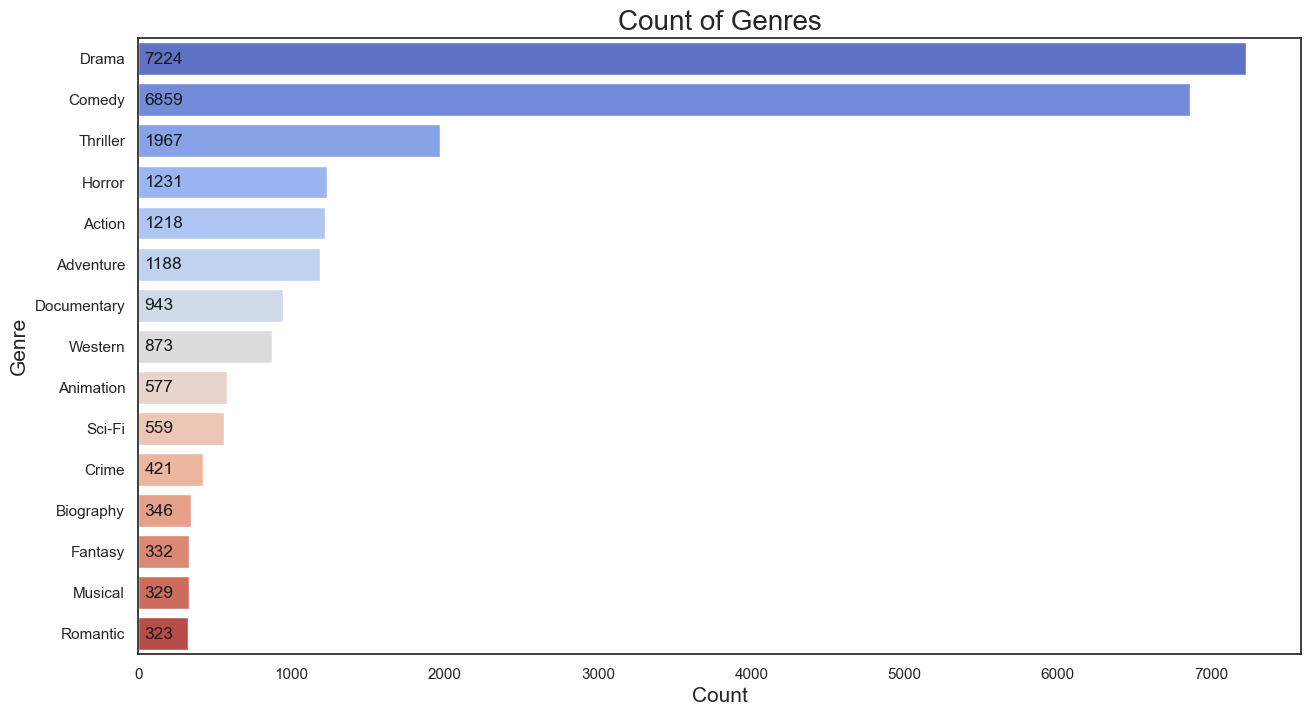

In [69]:
# importing package
import seaborn as sns

# counting top 15 genres
sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Count of Genres', size=20)
top15_genres = df_filmtv['genre'].value_counts()[:15]
ax = sns.barplot(x=top15_genres.values, y=top15_genres.index, palette='coolwarm')
plt.xlabel('Count', size=15)
plt.ylabel('Genre', size=15)
for i, v in enumerate(top15_genres.values):
    plt.text(x=40, y=i+0.12, s=v, color='k', fontsize=12.5)
plt.show()

Créer un diagramme en boîte et moustaches pour montrer la dispersion des notes des critiques pour les 15 genres les plus populaires. Cela montre quels genres sont les mieux et les moins bien considérés, car ces graphiques indiquent les extrêmes supérieurs et inférieurs, ainsi que la médiane (Persico, 2019).

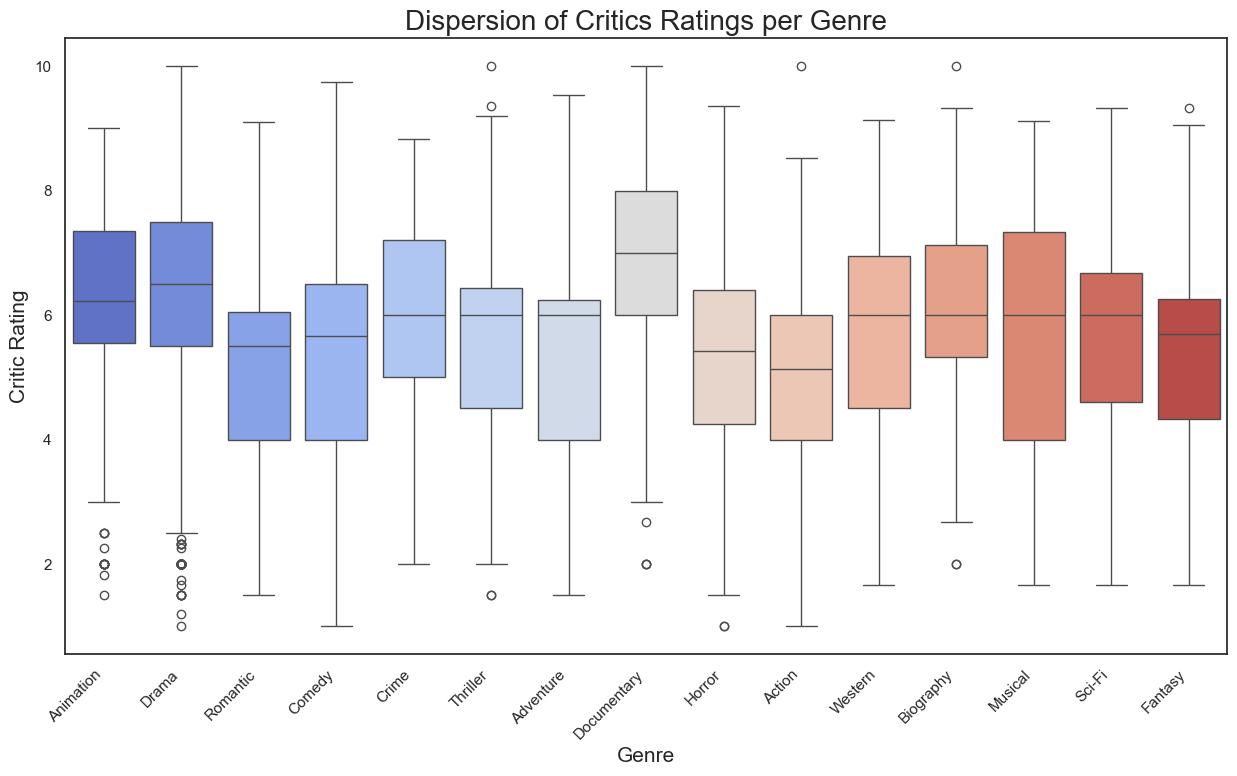

In [25]:
sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Dispersion of Critics Ratings per Genre', fontsize=20)

ax = sns.boxplot(
    data=df_filmtv[df_filmtv['genre'].isin(df_filmtv['genre'].value_counts()[:15].index)],
    x='genre',
    y='critics_vote',
    hue='genre',         # Ajout obligatoire
    palette='coolwarm',  # Maintenant accepté
    legend=False         # Pour éviter la légende inutile
)

plt.xlabel('Genre', fontsize=15)
plt.ylabel('Critic Rating', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()


Les documentaires ont la médiane de notation critique la plus élevée, suivis des films dramatiques. Les films d'action ont la plus basse, suivis des films d'horreur.

#### 5.2 Analyse des 200 meilleurs et des 200 pires films selon le vote des critiques

Afin de formuler des hypothèses, les 200 meilleurs et les 200 pires films sont analysés pour identifier d'éventuelles différences.

In [26]:
# creating a new dataframe for the top 200, sorted by critics_vote in descending order
top_200 = df_filmtv.sort_values('critics_vote', ascending=False).iloc[:200]

top_200

,filmtv_id,title,year,genre,duration,critics_vote,humor,rhythm,effort,tension,erotism,sum_attributes
31224,72167,Il pesce siluro è innocente - Per soli uomini,2014,Documentary,144,10.00,0,2,4,2,0,8
20197,34474,Abwärts,1984,Thriller,90,10.00,0,0,0,1,0,1
17757,28163,Grass,1925,Documentary,73,10.00,0,2,0,2,0,4
22748,39857,"Serge Gainsbourg, vie héroïque",2010,Biography,135,10.00,2,2,1,0,2,7
24255,42521,Race with the Devil,1975,Action,88,10.00,0,2,0,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
978,1471,What Ever Happened to Baby Jane?,1962,Drama,133,8.94,1,1,3,2,0,7
7894,11995,La terra trema,1948,Drama,157,8.94,0,3,4,3,0,10
7903,12009,Los olvidados,1950,Drama,88,8.94,0,2,4,3,0,9
17572,27911,Le deuxième souffle,1966,Drama,150,8.94,0,2,0,3,0,5


In [27]:
# creating a new dataframe for the bottom 200, sorted by critics_vote in ascending order
bottom_200 = df_filmtv.sort_values('critics_vote', ascending=True).iloc[:200]

bottom_200

,filmtv_id,title,year,genre,duration,critics_vote,humor,rhythm,effort,tension,erotism,sum_attributes
28800,57691,Amoreodio,2013,Drama,105,1.0,0,2,0,1,0,3
31617,74470,The Christmas Secret,2014,Comedy,90,1.0,0,0,1,0,0,1
32080,77780,10.0 Earthquake,2014,Action,88,1.0,0,1,0,1,1,3
32104,77940,Le Badanti,2015,Comedy,110,1.0,0,1,0,0,0,1
32636,81568,Rosso Mille Miglia,2015,Comedy,94,1.0,2,3,1,1,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...
20960,36871,...e venne il tempo di uccidere,1968,Western,95,2.0,0,1,0,1,0,2
26405,47124,Arctic Blast,2010,Sci-Fi,92,2.0,0,2,0,2,0,4
31894,76350,Ci devo pensare,2015,Comedy,90,2.0,1,1,0,0,0,2
8853,13409,Lipstick Camera,1994,Thriller,90,2.0,0,1,0,1,1,3


In [28]:
# summary of the top 200 data frame
print(top_200.describe())

          filmtv_id         year    duration  critics_vote       humor  \
count    200.000000   200.000000  200.000000    200.000000  200.000000   
mean   16258.735000  1961.315000  121.835000      9.189300    1.005000   
std    14593.214841    24.211085   78.079252      0.237403    1.082049   
min       51.000000  1916.000000   42.000000      8.940000    0.000000   
25%     4987.500000  1945.000000   89.750000      9.000000    0.000000   
50%    12194.500000  1957.500000  107.500000      9.110000    1.000000   
75%    23499.250000  1981.250000  129.250000      9.312500    1.000000   
max    72167.000000  2014.000000  924.000000     10.000000    4.000000   

           rhythm      effort     tension     erotism  sum_attributes  
count  200.000000  200.000000  200.000000  200.000000      200.000000  
mean     2.420000    2.900000    2.395000    0.770000        9.490000  
std      0.909801    1.248114    1.142586    0.872298        3.257755  
min      0.000000    0.000000    0.000000    

In [29]:
# summary of the bottom 200 data frame
print(bottom_200.describe())

           filmtv_id         year    duration  critics_vote       humor  \
count     200.000000   200.000000  200.000000    200.000000  200.000000   
mean    41204.850000  1999.380000   95.680000      1.854250    0.585000   
std     27980.325188    14.197303   19.338757      0.290067    0.696564   
min       455.000000  1958.000000   55.000000      1.000000    0.000000   
25%     21736.500000  1992.750000   89.000000      1.875000    0.000000   
50%     41410.000000  2004.500000   93.000000      2.000000    0.000000   
75%     55222.250000  2009.000000   98.000000      2.000000    1.000000   
max    218931.000000  2022.000000  254.000000      2.000000    3.000000   

           rhythm      effort     tension     erotism  sum_attributes  
count  200.000000  200.000000  200.000000  200.000000      200.000000  
mean     1.675000    0.225000    0.695000    0.340000        3.520000  
std      0.679473    0.562099    0.724291    0.629589        1.767831  
min      0.000000    0.000000    0.0

La durée moyenne des films dans le top 200 est de 121,8 minutes, alors qu'elle est de 97,4 minutes pour les films en bas du classement. Les films du top incluent un film d'une durée de 924 minutes, cependant, en excluant celui-ci, la moyenne reste supérieure à celle des films en bas du classement.

Les scores moyens pour les colonnes d'attributs sont également plus élevés pour les films du top par rapport aux films du bas de classement.

Cela implique que la durée, l'humour, le rythme, l'effort, la tension et l'érotisme sont positivement corrélés avec le score des critiques.

#### Par conséquent, l'hypothèse nulle est qu'il n'y a pas de relation entre la durée, l'humour, l'effort, la tension et l'érotisme (variables prédictives) et le score des critiques (variable cible).

#### L'hypothèse alternative est que les variables prédictives ont un effet positif sur la variable cible.

#### 5.3 Sélection des Variables

Pour sélectionner les variables prédictives les plus pertinentes, des corrélations sont calculées avec la variable cible.

Tout d'abord, les variables prédictives sont normalisées car elles ont des échelles différentes. Les variables ayant des échelles plus grandes peuvent avoir une influence disproportionnée sur la cible (Roy, 2020).

In [30]:
# suppression des colonnes non requises pour le modèle
df_filmtv = df_filmtv.drop(['filmtv_id','year','sum_attributes','genre','title'], axis=1)

In [31]:
# normalisation des colonnes prédictives en utilisant MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

cols_to_normalize = ['duration','humor','rhythm','effort','tension','erotism']

scaler = MinMaxScaler()

df_filmtv[cols_to_normalize] = scaler.fit_transform(df_filmtv[cols_to_normalize])

df_filmtv

,duration,critics_vote,humor,rhythm,effort,tension,erotism
0,0.039638,8.00,0.6,0.6,0.0,0.0,0.0
1,0.064553,6.00,0.0,0.4,0.0,0.4,0.0
2,0.056625,6.00,0.2,0.4,0.2,0.0,0.0
3,0.061155,8.00,0.4,0.4,0.0,0.2,0.4
4,0.049830,5.33,0.6,0.2,0.2,0.0,0.0
...,...,...,...,...,...,...,...
41321,0.045300,8.00,0.0,0.2,0.2,0.2,0.0
41342,0.071348,5.33,0.2,0.2,0.2,0.2,0.0
41348,0.084938,6.50,0.0,0.0,0.2,0.2,0.2
41377,0.056625,4.00,0.2,0.2,0.2,0.2,0.0


In [32]:
# convertion en dataframe
df_filmtv = pd.DataFrame(df_filmtv)
print(type(df_filmtv))

<class 'pandas.core.frame.DataFrame'>


In [33]:
# réorganisation des colonnes pour que la variable cible soit en premier
cols = ['critics_vote', 'duration', 'humor', 'rhythm', 'effort', 'tension', 'erotism']
df_filmtv = df_filmtv[cols]

df_filmtv

,critics_vote,duration,humor,rhythm,effort,tension,erotism
0,8.00,0.039638,0.6,0.6,0.0,0.0,0.0
1,6.00,0.064553,0.0,0.4,0.0,0.4,0.0
2,6.00,0.056625,0.2,0.4,0.2,0.0,0.0
3,8.00,0.061155,0.4,0.4,0.0,0.2,0.4
4,5.33,0.049830,0.6,0.2,0.2,0.0,0.0
...,...,...,...,...,...,...,...
41321,8.00,0.045300,0.0,0.2,0.2,0.2,0.0
41342,5.33,0.071348,0.2,0.2,0.2,0.2,0.0
41348,6.50,0.084938,0.0,0.0,0.2,0.2,0.2
41377,4.00,0.056625,0.2,0.2,0.2,0.2,0.0


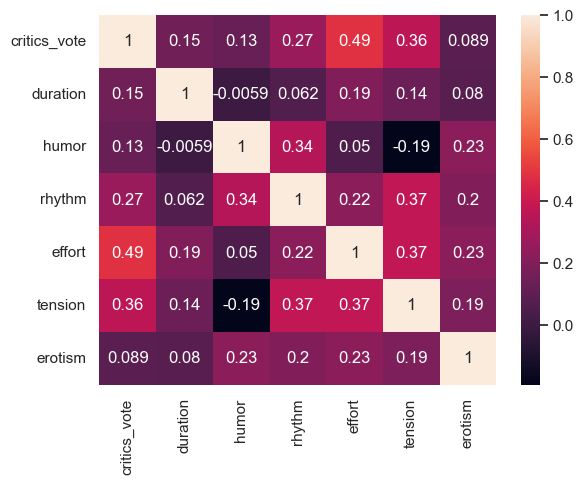

In [34]:
# création d'une carte thermique pour montrer les corrélations entre les variables prédictives et la variable cible
correlation_mat = df_filmtv.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Les seules variables présentant des corrélations notables sont l'effort et la tension. Cependant, comme leurs scores sont inférieurs à 0,5, la corrélation est faible. Les autres variables prédictives présentent peu ou pas de corrélation, avec des scores inférieurs à 0,3 (Calkins, 2005). L'effort et la tension seront inclus dans le modèle à titre de démonstration, mais la précision des résultats est susceptible d'être faible.

Les données sont divisées en ensembles d'entraînement et de test, de sorte que le modèle peut être construit avec les données d'entraînement, qui sont ensuite utilisées pour prédire la variable cible dans les données de test ou dans toutes nouvelles données (Brownlee, 2020).

In [35]:
# splitting data into fifths for 80:20 split
df_filmtv['Sample'] = df_filmtv.index % 5

# splitting data into 80:20, train and test
df_filmtv_train = df_filmtv[df_filmtv['Sample'] != 1].copy()
df_filmtv_test  = df_filmtv[df_filmtv['Sample'] == 1].copy()

In [36]:
# vérification de la longueur des données d'entraînement
len(df_filmtv_train)

20742

In [37]:
# vérification de la longueur des données d'entraînement
len(df_filmtv_test)

5213

Le modèle de régression linéaire est construit en utilisant la variable cible et les variables prédictives d'effort et de tension.

In [38]:
import statsmodels.api as sm

# setting the Y object as the target variable
Y_target = df_filmtv_train['critics_vote'].values

# selecting the predictor variable columns
chosen_columns_train = df_filmtv_train[['effort','tension']]

# setting the X object as the chosen predictor variables
X_predictors = chosen_columns_train

# adding a constant for the intercept coefficient (alpha)
X_predictors = sm.add_constant(X_predictors)

# fitting the model
our_lr = sm.OLS(Y_target, X_predictors).fit()


our_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     3922.
Date:                Sun, 23 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:36:43   Log-Likelihood:                -35119.
No. Observations:               20742   AIC:                         7.024e+04
Df Residuals:                   20739   BIC:                         7.027e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8315      0.016    302.932      0.000       4.800       4.863
effort         2.5090      0.040     63.134      0.000       2.431       2.587
tension        1.5905      0.047     34.201      0.000       1.499       1.682
==============================================================================
Omnibus:                      169.312   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.288
Skew:                          -0.218   Prob(JB):                     3.87e-38
Kurtosis:                       2.905   Cond. No.                         6.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le R-carré ajusté est de 0,274, donc seulement 27,4 % de la variation de la variable cible est expliquée par la variation des variables prédictives (Bhandari, 2020).
##### Il est conseillé de considérer une valeur de 0,3 comme très faible (Moore et al, 2013), par conséquent le modèle ne peut pas faire de prédictions précises.

Le coefficient pour l'effort est de 2,5090 et de 1,5905 pour la tension, donc si le vote des critiques augmente d'une unité, l'effort et la tension augmenteront de ces montants (Rsundery, 2021).
##### Le modèle montre que l'effort et la tension ont un effet positif sur le vote des critiques, ce qui est conforme à l'hypothèse alternative.

La valeur p montre la probabilité que le coefficient soit dû au hasard. Pour chaque variable, la valeur p teste l'hypothèse nulle selon laquelle le prédicteur n'a aucun effet sur la cible (Rédacteur du Blog Minitab).
##### Comme les valeurs p sont nulles, l'hypothèse nulle peut être rejetée pour l'effort et la tension.

Les prédictions seront maintenant comparées aux valeurs réelles.

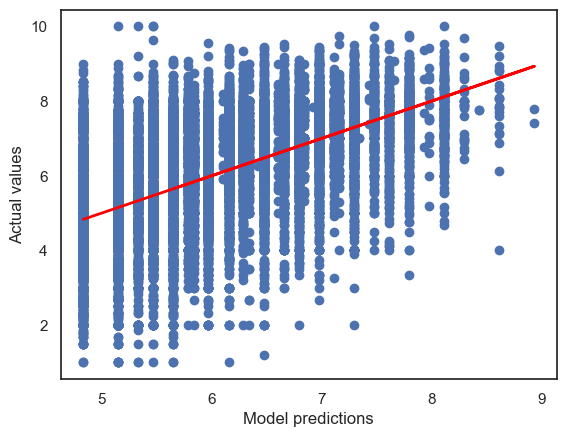

In [39]:
# inserting the predicted values into the train dataframe
df_filmtv_train['pred'] = our_lr.predict(X_predictors)

# showing as a scatterplot
plt.scatter(df_filmtv_train['pred'],df_filmtv_train['critics_vote'])

# adding line of best fit
plt.plot(df_filmtv_train['pred'], our_lr.predict(X_predictors), color='red', linewidth=2, label='Line of Best Fit')

plt.xlabel('Model predictions')
plt.ylabel('Actual values')

plt.show()

In [40]:
# calculating correlation between predicted and actual values
print(df_filmtv_train['pred'].corr(df_filmtv_train['critics_vote']))

0.5238583815798891


Le modèle n'est pas capable de prédire avec précision le vote des critiques car la plupart des points sur le nuage de points ne sont pas proches de la droite de régression, et la corrélation entre les valeurs prédites et les valeurs réelles est modérée (Calkins, 2005).

Nous allons maintenant examiner les résultats générés à l'aide des données de test.

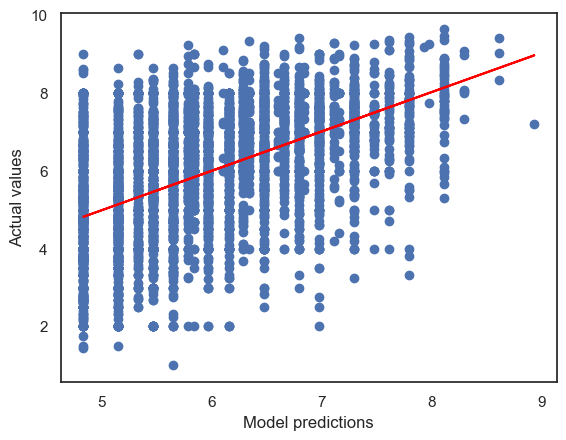

In [41]:
import numpy as np

# defining the predictors
X = df_filmtv_test[['effort','tension']]

# adding the constant
X = sm.add_constant(X)

# creating the predicted value based on the model
df_filmtv_test['pred'] = our_lr.predict(X)

# showing as a scatterplot
plt.scatter(df_filmtv_test['pred'],df_filmtv_test['critics_vote'])

# adding a line of best fit
fit = np.polyfit(df_filmtv_test['pred'], df_filmtv_test['critics_vote'], 1)
fit_fn = np.poly1d(fit)
plt.plot(df_filmtv_test['pred'], fit_fn(df_filmtv_test['pred']), color='red', label='Line of Best Fit')

plt.xlabel('Model predictions')
plt.ylabel('Actual values')

plt.show()

In [42]:
# calculating correlation between predicted and actual values
print(df_filmtv_test['pred'].corr(df_filmtv_test['critics_vote']))

0.5296761555388989


Les résultats utilisant les données de test sont similaires à ceux des données d'entraînement, en ce sens que les points de données ne sont généralement pas proches de la ligne de meilleure adaptation, et la corrélation a une valeur similaire.

Cela montre que les données d'entraînement sont une bonne représentation de l'ensemble du jeu de données, cependant le modèle n'est pas capable de prédire les résultats avec précision.

### 6. Itération

Ce modèle a rencontré un succès limité en raison de la faible valeur du R-carré ajusté, il ne résout donc pas le problème commercial. Cependant, le code pourrait être appliqué à un autre échantillon de données, par exemple en se concentrant sur les films des années 2020 pour tenter de déterminer ce qui rend un film moderne réussi, ou en se concentrant sur les films d'un genre particulier.

### References

Bayat, 2022
Bayat, B. (2022). IMDB Rating Prediction using Linear Regression and Web Scraping. [online] Medium. Available at: https://medium.com/@birsenba/imdb-rating-prediction-using-linear-regression-and-web-scraping-f97f3780ba86  

Bhandari, Aniruddha. “Key Difference between R-Squared and Adjusted R-Squared for Regression Analysis.” Analytics Vidhya, 7 July 2020, www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/#:~:text=R2%20represents%20the%20proportion%20of.

Bobbitt, 2023
Bobbitt, Z. (2023). Slovin’s Formula Calculator. [online] Statology. Available at: https://www.statology.org/slovins-formula-calculator/.

Brownlee, Jason. “Train-Test Split for Evaluating Machine Learning Algorithms.” Machine Learning Mastery, 23 July 2020, machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/.

Calkins, Keith. “Correlation Coefficients.” Www.andrews.edu, 18 July 2005, www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are.

Hayes, 2023
Hayes, A. (2021). Confidence Interval Definition. [online] Investopedia. Available at: https://www.investopedia.com/terms/c/confidenceinterval.asp.

Indeed Editorial Team, 2023
Indeed Editorial Team (2023). Understanding When To Use Linear Regression (With Examples). [online] Indeed. Available at: https://www.indeed.com/career-advice/career-development/when-to-use-linear-regression.

Lazovskiy, 2023
Lazovskiy, V. (2018). Predicting Film Ratings With Simple Linear Regression. [online] Medium. Available at: https://medium.com/@lazovskiy.vladimir/predicting-film-ratings-with-simple-linear-regression-cabe35bddcde

Mcleod, 2023
Mcleod, S. (2019). What is a Normal Distribution in Statistics? [online] Simplypsychology.org. Available at: https://www.simplypsychology.org/normal-distribution.html.

Mesevage, T.G. (2021). Data Cleaning Steps & Process to Prep Your Data for Success. [online] MonkeyLearn Blog. Available at: https://monkeylearn.com/blog/data-cleaning-steps/.

Minitab Blog Editor. “How to Interpret Regression Analysis Results: P-Values and Coefficients.” Blog.minitab.com, 1 July 2013, blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients.

Moore, David S, et al. The Basic Practice of Statistics. 6th ed., New York, W.H. Freeman, 2013, p. 138.

Persico, A. (2019). Box and Whisker Plots Explained in 5 Easy Steps. [online] Mashup Math. Available at: https://www.mashupmath.com/blog/box-and-whisker-plots-explained.

Rout, A.R. (2020). ML - Advantages and Disadvantages of Linear Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/.

Roy, Baijayanta. “All about Feature Scaling.” Medium, 7 Apr. 2020, towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35.

Sleeper, R. (2019). How to Change Sort Order with Buttons in Tableau | Playfair+. [online] Playfair Data. Available at: https://playfairdata.com/how-to-change-sort-order-with-buttons-in-tableau/

Smith, A. (2023). 7 Fundamental Steps to Complete a Data Analytics Project. [online] blog.dataiku.com. Available at: https://blog.dataiku.com/fundamental-steps-data-project-success.

Tomboc, K. (2021). 20 Essential Types of Graphs and When to Use Them. [online] Piktochart. Available at: https://piktochart.com/blog/types-of-graphs/#piechart


Rsundery. “Interpreting the Results of Linear Regression Using OLS Summary.” GeeksforGeeks, 16 Mar. 2021, www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/.

Valcheva, S. (2017). Types of Graphs and Charts and Their Uses: with Examples and Pics. [online] Blog For Data-Driven Business. Available at: https://www.intellspot.com/types-graphs-charts/.

Yi, M. (2021). A Complete Guide to Bar Charts. [online] Chartio. Available at: https://chartio.com/learn/charts/bar-chart-complete-guide/.
